In [1]:
import sys
sys.path.append('../wamuu')
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from instance import Instance
from utils import sweep_groups, sort_group_by_subst_dist, prim

In [2]:
I = Instance(
    instance_dir='../data/raw',
    instance='n50_s01_t01_w01'
)

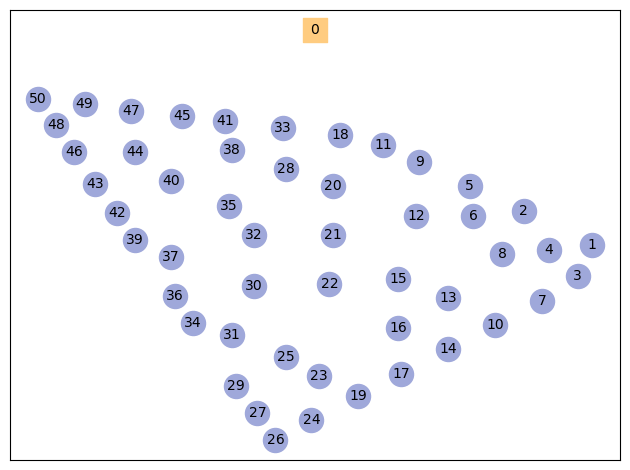

In [3]:
G = nx.DiGraph()
for i in range(I.n+1):
    G.add_node(i, pos=I.nodes[i])
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(1, I.n+1),
                       node_color='#9FA8DA')
nx.draw_networkx_labels(G, pos,
                        font_size=10)
plt.tight_layout()
plt.show()

In [4]:
groups = sweep_groups(I.n,
                      starting_index=9,
                      clockwise=True,
                      tpg = I.n//I.C + 1)
for group in groups:
    print(group)

[1, 2, 3]
[4, 5, 6, 7, 8]
[9, 10, 11, 12, 13, 14, 15, 16, 17]
[18, 19, 20, 21, 22, 23, 24, 25, 26]
[27, 28, 29, 30, 31, 32, 33, 34, 35]
[36, 37, 38, 39, 40, 41, 42, 43, 44]
[45, 46, 47, 48, 49, 50]


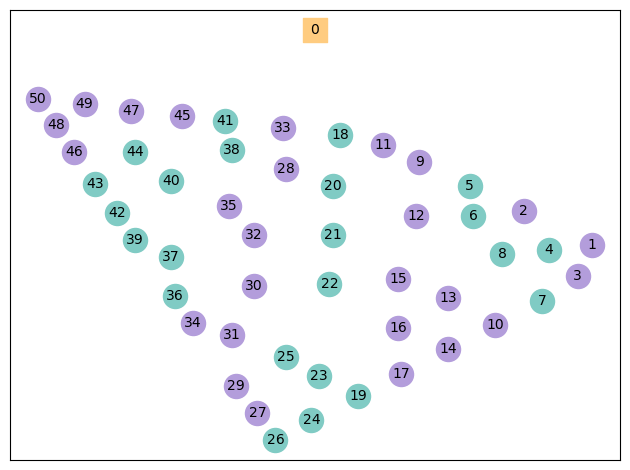

In [5]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2])
nx.draw_networkx_labels(G, pos,
                        font_size=10)
plt.tight_layout()
plt.show()

In [6]:
ord_groups = [sort_group_by_subst_dist(group, I.dist) for group in groups]
for group in ord_groups:
    print(group)

[2, 1, 3]
[5, 6, 8, 4, 7]
[11, 9, 12, 15, 13, 16, 10, 14, 17]
[18, 20, 21, 22, 25, 23, 19, 24, 26]
[33, 28, 35, 32, 30, 34, 31, 29, 27]
[41, 38, 44, 40, 43, 42, 39, 37, 36]
[45, 47, 49, 48, 50, 46]


In [7]:
edges_group = [prim(group, I.dist, group[0]) for group in ord_groups]
for edges in edges_group:
    print(edges)

[[1, 2], [3, 1]]
[[6, 5], [8, 6], [4, 8], [7, 4]]
[[9, 11], [12, 9], [15, 12], [13, 15], [10, 13], [14, 10], [17, 14], [16, 14]]
[[20, 18], [21, 20], [22, 21], [25, 22], [23, 25], [19, 23], [24, 19], [26, 24]]
[[28, 33], [35, 28], [32, 35], [30, 32], [31, 30], [34, 31], [29, 31], [27, 29]]
[[38, 41], [40, 38], [44, 40], [43, 44], [42, 43], [39, 42], [37, 39], [36, 37]]
[[47, 45], [49, 47], [48, 49], [46, 48], [50, 48]]


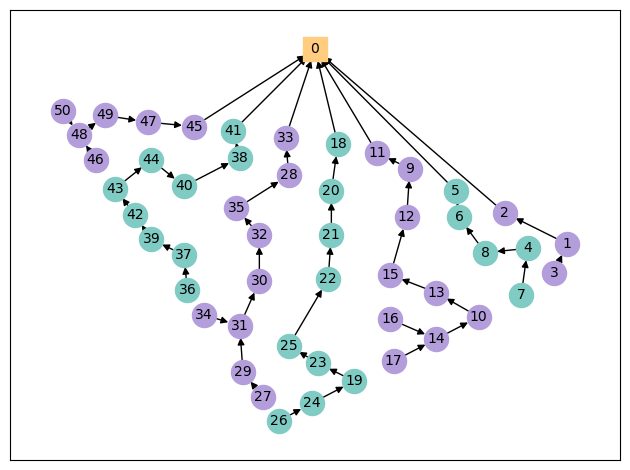

In [8]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2])
edgelist = []
for edges in edges_group:
    edgelist.extend(edges)
for group in ord_groups:
    edgelist.append([group[0], 0])
nx.draw_networkx_edges(G, pos, edgelist)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.tight_layout()
plt.show()